In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Time Series 

In [ ]:
# Longitudinal blood pressure measurements into proper time series 

# Load in the longitudinal data
long_data = pd.read_csv('patient_longitudinal.csv', sep='\t')
# Convert the visit_date to a datetime object
long_data['visit_date'] = pd.to_datetime(long_data['visit_date'], format='%Y-%m-%d')
# Check duplicates 
long_data = long_data.groupby(['patient_id', 'visit_date']).mean().reset_index()
# Set the visit_date as the index
long_data.set_index('visit_date', inplace=True)
# Check for missing values
long_data.isnull().sum()    

long_data



,patient_id,bp_systolic,heart_rate,adverse_event,age,sex,bmi,smoking,diabetes
visit_date,,,,,,,,,
2023-01-17,0,111.0,78.7,0.0,57.5,0.0,25.8,0.0,0.0
2023-09-23,0,112.0,79.5,0.0,57.5,0.0,25.8,0.0,0.0
2024-05-22,0,111.2,78.7,0.0,57.5,0.0,25.8,0.0,0.0
2024-12-31,0,109.2,79.5,0.0,57.5,0.0,25.8,0.0,0.0
2023-01-17,1,146.1,78.9,0.0,47.9,0.0,23.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-12-31,998,136.9,77.1,0.0,41.4,0.0,24.2,0.0,0.0
2023-01-17,999,140.5,96.6,1.0,58.6,0.0,25.6,0.0,0.0
2023-09-23,999,140.2,98.6,0.0,58.6,0.0,25.6,0.0,0.0


First, I changed the visit_date to a standard date format and then checked for duplicates, which were in the patient_id and visit_data columns. After, I set an index have the same set for all the columns and then checked if there was any missing data. Now, all the data is in the same format and ready to be explored.

/var/folders/0p/mhfw5nc90kb12y_k1y5ml67r0000gp/T/ipykernel_1720/2647759855.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_freq = long_data['bp_systolic'].resample('M').mean()


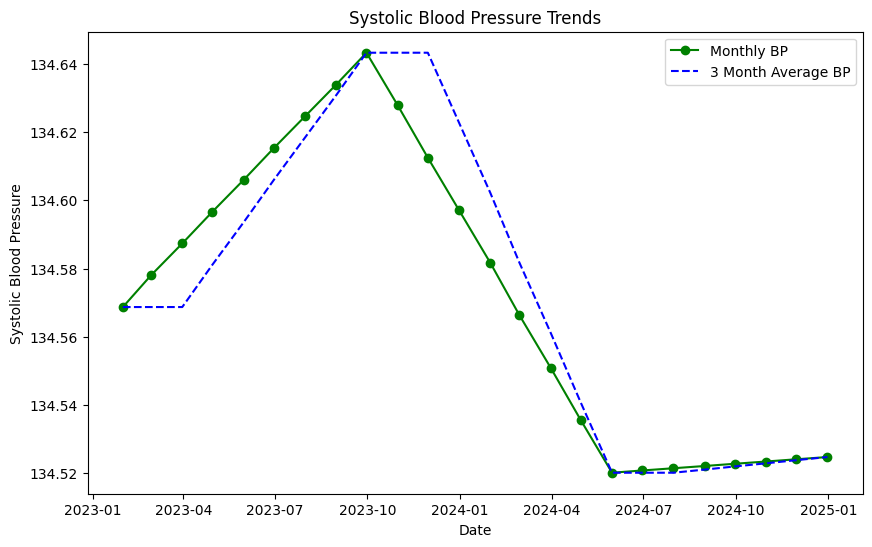

In [ ]:
# Analyze blood pressure trends 

# Month frequency 
month_freq = long_data['bp_systolic'].resample('M').mean()  

# Calculate 3 month average of blood pressure
month_freq_average = month_freq.rolling(window=3, min_periods = 1).mean()
month_freq = month_freq.interpolate()
month_freq_average = month_freq_average.interpolate()

# Plot the blood pressure trends
plt.figure(figsize=(10, 6))
plt.plot(month_freq, label='Monthly BP', color='green', marker='o', linestyle='-')
plt.plot(month_freq_average, label='3 Month Average BP', color= 'blue', linestyle ='--')
plt.title('Systolic Blood Pressure Trends')
plt.xlabel('Date')
plt.ylabel('Systolic Blood Pressure')
plt.legend()
plt.show()

The graph shows the month to month trends of systolic blood pressure. The 3 month average identifies the overall trend without the influence of minor monthly fluctuations, showing a clearer view of the long term change in BP. I used interpolate() to esitmate the unknown values that fall between the known values. 

# Statistical Modeling Tasks

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     514.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:58:02   Log-Likelihood:                -15095.
No. Observations:                4000   AIC:                         3.020e+04
Df Residuals:                    3995   BIC:                         3.023e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.0140      1.074    100.607      0.0

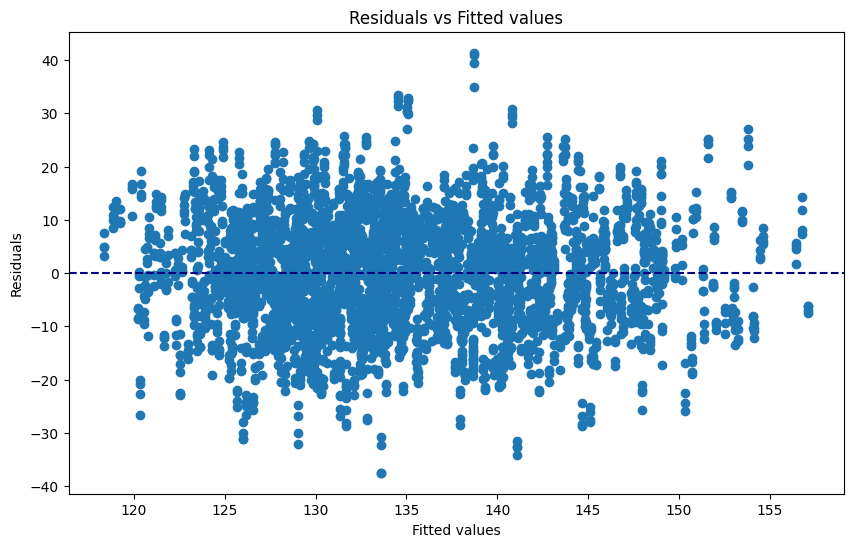

<Figure size 1000x600 with 0 Axes>

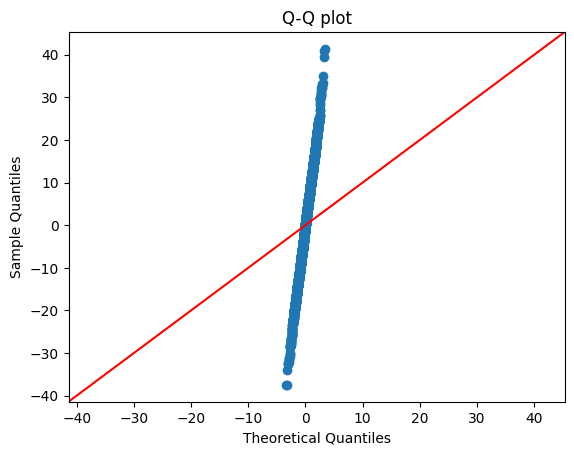

                            OLS Regression Results                            
Dep. Variable:            bp_systolic   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     525.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):               0.00
Time:                        19:58:03   Log-Likelihood:                -15095.
No. Observations:                4000   AIC:                         3.020e+04
Df Residuals:                    3995   BIC:                         3.023e+04
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.0140      1.073    100.712      0.0

In [ ]:
# Analyze factors affecting baseline blood pressure 

# Set X variables as age, bmi, smoking, diabetes 
X = long_data[['age', 'bmi', 'smoking', 'diabetes']]
Y = long_data['bp_systolic']

# Intercept column to the X variables
X = sm.add_constant(X)

# Fit the model 
model = sm.OLS(Y, X).fit()
print(model.summary())

# Plot residuals vs fitted values 
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(y=0, color='navy', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')
plt.show()

# Plot Q-Q plot
plt.figure(figsize=(10, 6))
sm.qqplot(model.resid, line ='45')
plt.title('Q-Q plot')
plt.show()

# Robust standard errors with HC3
model_robust = model.get_robustcov_results(cov_type='HC3')
print(model_robust.summary())

The regression analysis reveals that the model is about 34% of the variability in blood pressure which shows a decent fit. The constant of 108.014 shows the baseline BP when all predictors are zero. The age increases 0.285 mmHG in BP every addition year. The BMI correlates with higher BP. All predictors are statistically significant, with a p-value less than 0.001. The residuals vs fitted plot shows that the residuals are symmetrically scattered around zero, meaning linearity and constant variance so it was a good model fit. The Q-Q plot largely follow the line so the normality assumption is met for residuals. 

In [68]:
# Model treatment effectiveness 

# Load in treatment data
treatment_data = pd.read_csv('patient_treatment.csv', sep='\t')
y = treatment_data['outcome']
X = treatment_data[['treatment', 'age', 'bmi', 'smoking', 'diabetes', 'adherence']]
X = sm.add_constant(X)
# GLM model 
model = sm.GLM(y, X, family=sm.families.Binomial()).fit()
print(model.summary())
# Odds Ratio and 95% CI
print("Odds Ratio:", np.exp(model.params))
print("Confidence Intervals:", np.exp(model.conf_int()))
# Influence Observations
influence = model.get_influence()
influence_summary = influence.summary_frame()
print(influence_summary)
# Residual deviance vs null deviance
print("Residual Deviance:", model.deviance)
print("Null Deviance:", model.null_deviance)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                outcome   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      993
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -601.75
Date:                Tue, 05 Nov 2024   Deviance:                       1203.5
Time:                        22:26:16   Pearson chi2:                     997.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1230
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3329      0.720     -3.242      0.0

The logistic regression model indicates that treatment and adherence are the most significant factors influencing a successful outcome. The intercept of -2.3329 represents the log odds of success when all predictors are zero. Treatment has a coefficient of 1.4239, meaning it increases the likelihood of success, with an odds ratio of 4.15. This implies that individuals receiving treatment have 4.15 times higher odds of a successful outcome compared to those not receiving treatment, highlighting its effectiveness. Adherence also plays a crucial role, with a coefficient of 1.9230 and an odds ratio of 6.841, indicating that higher adherence is strongly associated with improved treatment success. In contrast, age and BMI have very small, statistically insignificant effects, with p-values close to 1, suggesting they have no meaningful impact on treatment success. Smoking, with a coefficient of -0.4244, decreases the chances of success, and the odds ratio of 0.654 suggests that smokers have 35% lower odds of a successful outcome compared to non-smokers. Diabetes similarly shows a negative effect on success, aligning with the findings for smoking. Model diagnostics show stability, as no influential points were identified using Cook's distance. The confidence intervals for age and BMI include zero, confirming their lack of significance, while those for smoking (-0.841, -0.008) and diabetes indicate a negative impact. The model's null deviance is 1334.77, and the residual deviance is 1203.51, suggesting that the predictors explain a substantial amount of the variance in treatment success. Overall, treatment and adherence are the strongest positive predictors, while smoking and diabetes reduce the likelihood of success. Age and BMI show minimal influence on the outcome.